In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
set_config(transform_output="pandas")

In [3]:
#load in data
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


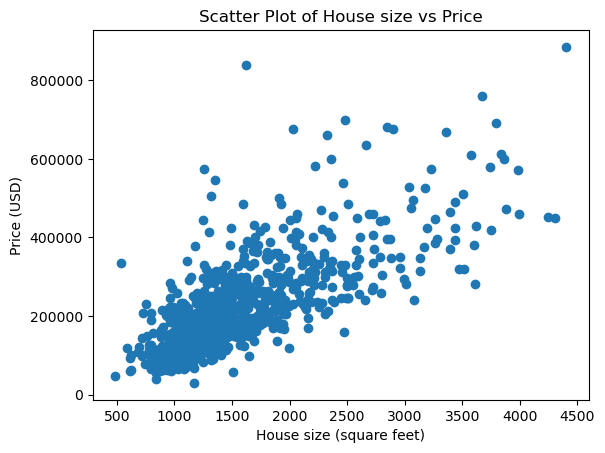

In [4]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()


In [5]:
np.random.seed(10)
small_sacramento = sacramento.sample(n = 30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


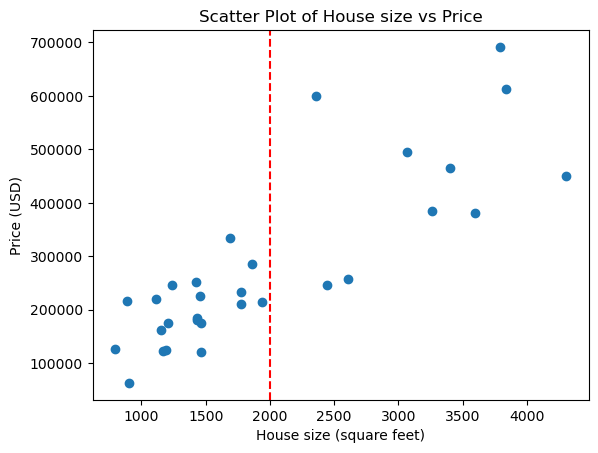

In [6]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()


In [7]:
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()

In [8]:
nearest_neighbors = small_sacramento.nsmallest(5, "dist")
nearest_neighbors

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,dist
280,3228 I ST,SACRAMENTO,95816,CA,4,3,1939,Residential,Mon May 19 00:00:00 EDT 2008,215000,38.573844,-121.462839,61
197,8986 HAFLINGER WAY,ELK GROVE,95757,CA,3,2,1857,Residential,Fri May 16 00:00:00 EDT 2008,285000,38.397923,-121.450219,143
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276,224
599,5340 BIRK WAY,SACRAMENTO,95835,CA,3,2,1776,Residential,Tue May 20 00:00:00 EDT 2008,234000,38.672495,-121.515251,224
786,8025 PEERLESS AVE,ORANGEVALE,95662,CA,2,1,1690,Residential,Wed May 21 00:00:00 EDT 2008,334150,38.711470,-121.216214,310


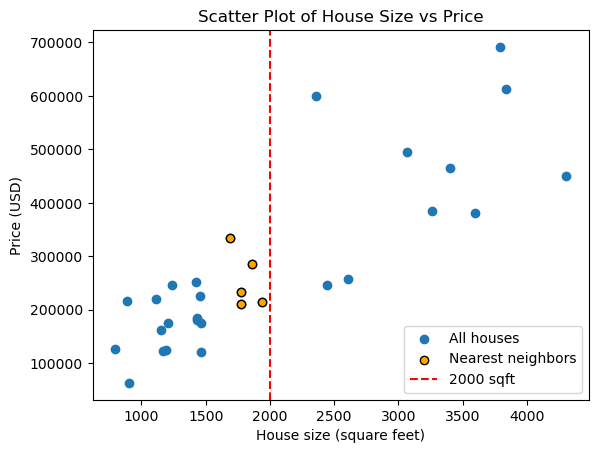

In [9]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [10]:
prediction = nearest_neighbors["price"].mean()
prediction

255630.0

In [11]:
sacramento_train, sacramento_test = train_test_split(sacramento, train_size= 0.75, random_state=42, shuffle= True)

In [12]:
# split training data into X and y
X_train = sacramento_train[["sq__ft"]]
y_train = sacramento_train["price"]

In [14]:
#initialize our model
knn_regressor = KNeighborsRegressor()

In [15]:
param_grid = {
    "n_neighbors" : range(1,201,3)
}

In [26]:
#intialize our grid search
sacr_gridsearch = GridSearchCV(
   estimator = knn_regressor,
   param_grid= param_grid,
   cv = 5 ,
   scoring = "r2"
)

In [27]:
#fit our grid search
sacr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 201, 3)}, scoring='r2')

In [28]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002324,0.002057,0.001237,0.000173,1,{'n_neighbors': 1},0.213437,0.131171,0.330558,0.120592,-0.322579,0.094636,0.221743,67
1,0.000886,0.000175,0.000971,0.000269,4,{'n_neighbors': 4},0.536516,0.438401,0.471324,0.503908,0.015937,0.393217,0.191452,61
2,0.000872,0.000311,0.000806,0.000181,7,{'n_neighbors': 7},0.556448,0.467146,0.499272,0.537719,0.144599,0.441037,0.151404,39
3,0.000646,0.000056,0.000682,0.000044,10,{'n_neighbors': 10},0.581503,0.463976,0.513914,0.571437,0.181752,0.462517,0.146625,25
4,0.000576,0.000076,0.000869,0.000400,13,{'n_neighbors': 13},0.607809,0.485384,0.508311,0.568228,0.235451,0.481037,0.130191,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000846,0.000295,0.002565,0.000746,187,{'n_neighbors': 187},0.477140,0.355215,0.347335,0.418403,0.350743,0.389767,0.050934,62
63,0.000751,0.000303,0.002207,0.000377,190,{'n_neighbors': 190},0.471755,0.351073,0.344843,0.413236,0.349348,0.386051,0.049705,63
64,0.000886,0.000317,0.002268,0.000235,193,{'n_neighbors': 193},0.467113,0.347963,0.341411,0.408353,0.349048,0.382778,0.048636,64
65,0.000771,0.000163,0.002351,0.000471,196,{'n_neighbors': 196},0.462844,0.346956,0.337867,0.403195,0.347621,0.379697,0.047574,65


In [ ]:
#only for neg rmspe
results["mean_test_score"] = results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002806,0.002191,0.001456,0.000606,1,{'n_neighbors': 1},-109655.806526,-120595.130103,-112297.705616,-120818.303875,-112115.342058,115096.457636,4675.375295,67
1,0.001012,0.000429,0.000933,0.000150,4,{'n_neighbors': 4},-84174.862641,-96956.242253,-99795.018109,-90744.186040,-96708.754264,93675.812662,5590.476086,49
2,0.001573,0.001139,0.001488,0.000635,7,{'n_neighbors': 7},-82345.022650,-94442.362234,-97121.482754,-87597.243261,-90165.220710,90334.266322,5182.482900,31
3,0.001103,0.000278,0.001162,0.000405,10,{'n_neighbors': 10},-79985.458885,-94722.834905,-95690.903059,-84342.146484,-88185.414673,88585.351601,6004.672460,20
4,0.000716,0.000163,0.000678,0.000118,13,{'n_neighbors': 13},-77430.800364,-92812.039395,-96240.816885,-84657.354893,-85242.671132,87276.736534,6617.179998,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000707,0.000140,0.001741,0.000189,187,{'n_neighbors': 187},-89404.102502,-103889.117510,-110881.591477,-98253.628778,-78552.980467,96196.284147,11282.645963,62
63,0.000503,0.000024,0.001708,0.000226,190,{'n_neighbors': 190},-89863.315392,-104222.245365,-111093.057167,-98689.116523,-78637.308937,96501.008677,11318.161791,63
64,0.000745,0.000149,0.002287,0.000609,193,{'n_neighbors': 193},-90257.326655,-104471.730296,-111383.626131,-99098.910125,-78655.460986,96773.410839,11391.662919,64
65,0.000593,0.000143,0.001805,0.000182,196,{'n_neighbors': 196},-90618.127253,-104552.352275,-111682.970126,-99529.902613,-78741.616470,97024.993747,11429.101358,65


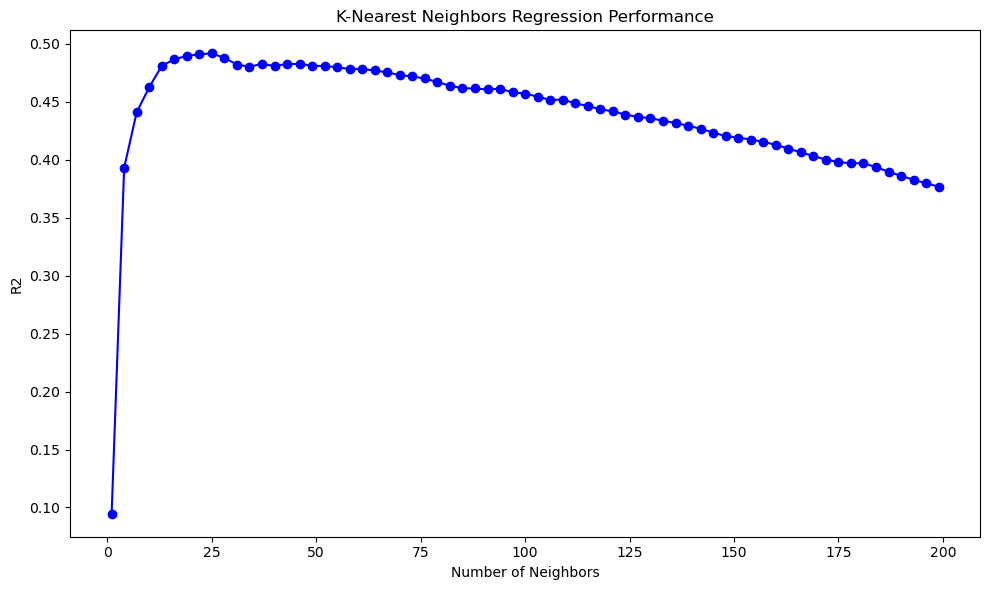

In [30]:

#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [31]:
sacr_gridsearch.best_params_

{'n_neighbors': 25}

In [32]:
#make predictions on the test set
sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft"]])

rmspe = mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)**(1/2)
rmspe

71880.78141898243

In [33]:
r2 = r2_score(
    y_true = sacramento_test["price"],
    y_pred= sacramento_test["predicted"]   
)
r2

0.5268400749269011

/Users/juliagallucci/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


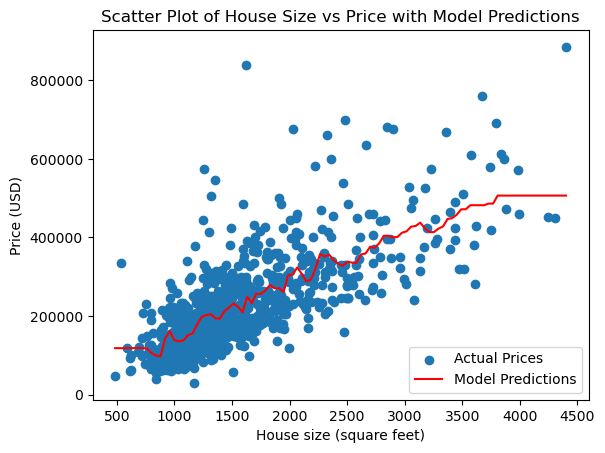

In [34]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show();


In [ ]:
#extra after class : average weighted by distance
model = KNeighborsRegressor(n_neighbors= 5, weights="distance")
model.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')